# Setup

Importing libraries, reaading the dataframe from the excel file, setting the seed for reproducibility and setting <code>ignore warnings</code>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import xgboost

df = pd.read_excel('Needs.xls')

seed = 69

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

The first column (<code>ID</code>) is deleted, since it is useless for classification purposes.

In [2]:
df.drop(labels='ID', axis=1, inplace=True)

The dataframe is shuffled and split into samples (<code>x_df</code>) and targets (<code>y_inc_df</code> and <code>y_acc_df</code>). The target dataframes are two since two different classifiers will be used to predict <code>income investment propensity</code> and <code>accumulation investment propensity</code>.

In [25]:
df = df.sample(frac = 1, random_state = seed)

x_df = df[['Age', 'Gender', 'FamilyMembers', 'FinancialEducation', 'RiskPropensity', 'Income', 'Wealth']]
y_inc_df = df['IncomeInvestment']
y_acc_df = df['AccumulationInvestment']

# Data Exploration

Feature distributions are plotted.

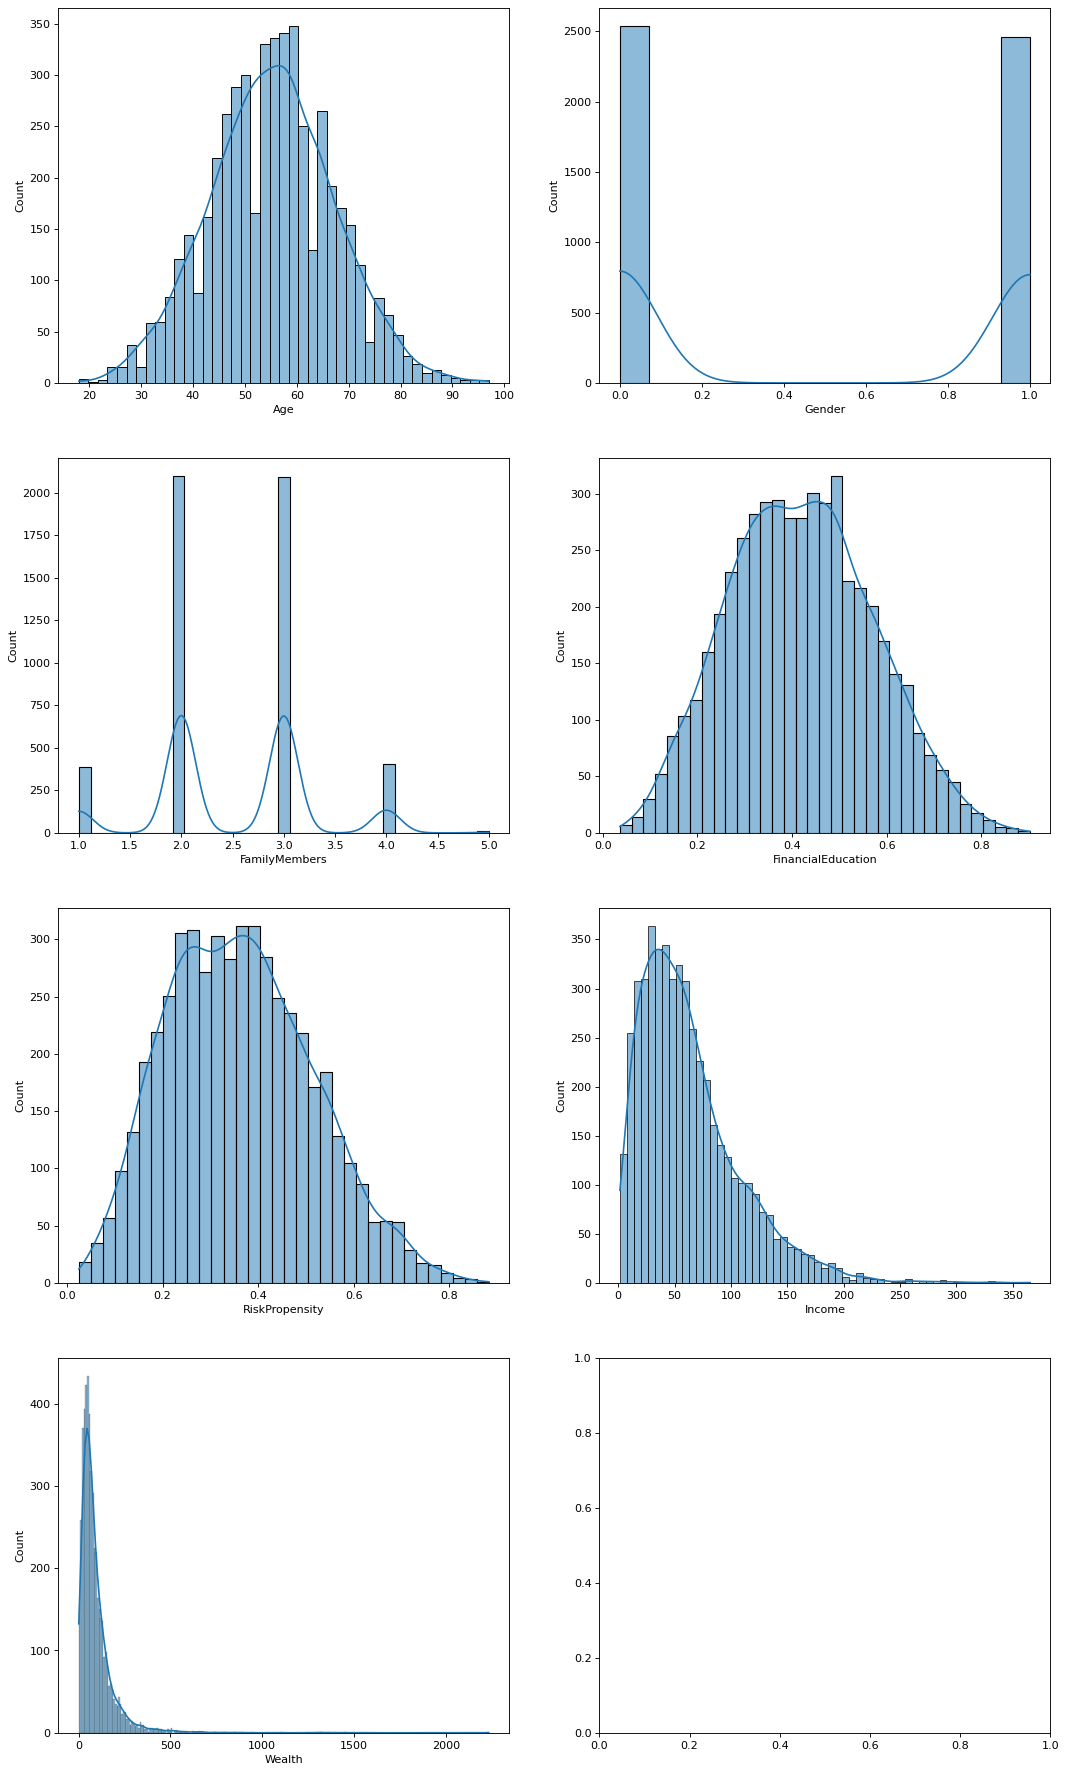

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(16,28), dpi=80)
features = x_df.columns

row = column = 0

for f in features:
    ax = axes[row][column]

    sns.histplot(data=x_df, x=f, ax=ax, kde=True)

    column = column + 1
    if column % 2 == 0:
        column = 0
        row = row + 1 

The scatterplots of each feature versus the other using the labels <code>IncomeInvestment</code> and <code>AccumulationInvestment</code> as grouping variables are plotted. This is done mainly to determine whether one or more features could be considered useless for classification purposes.

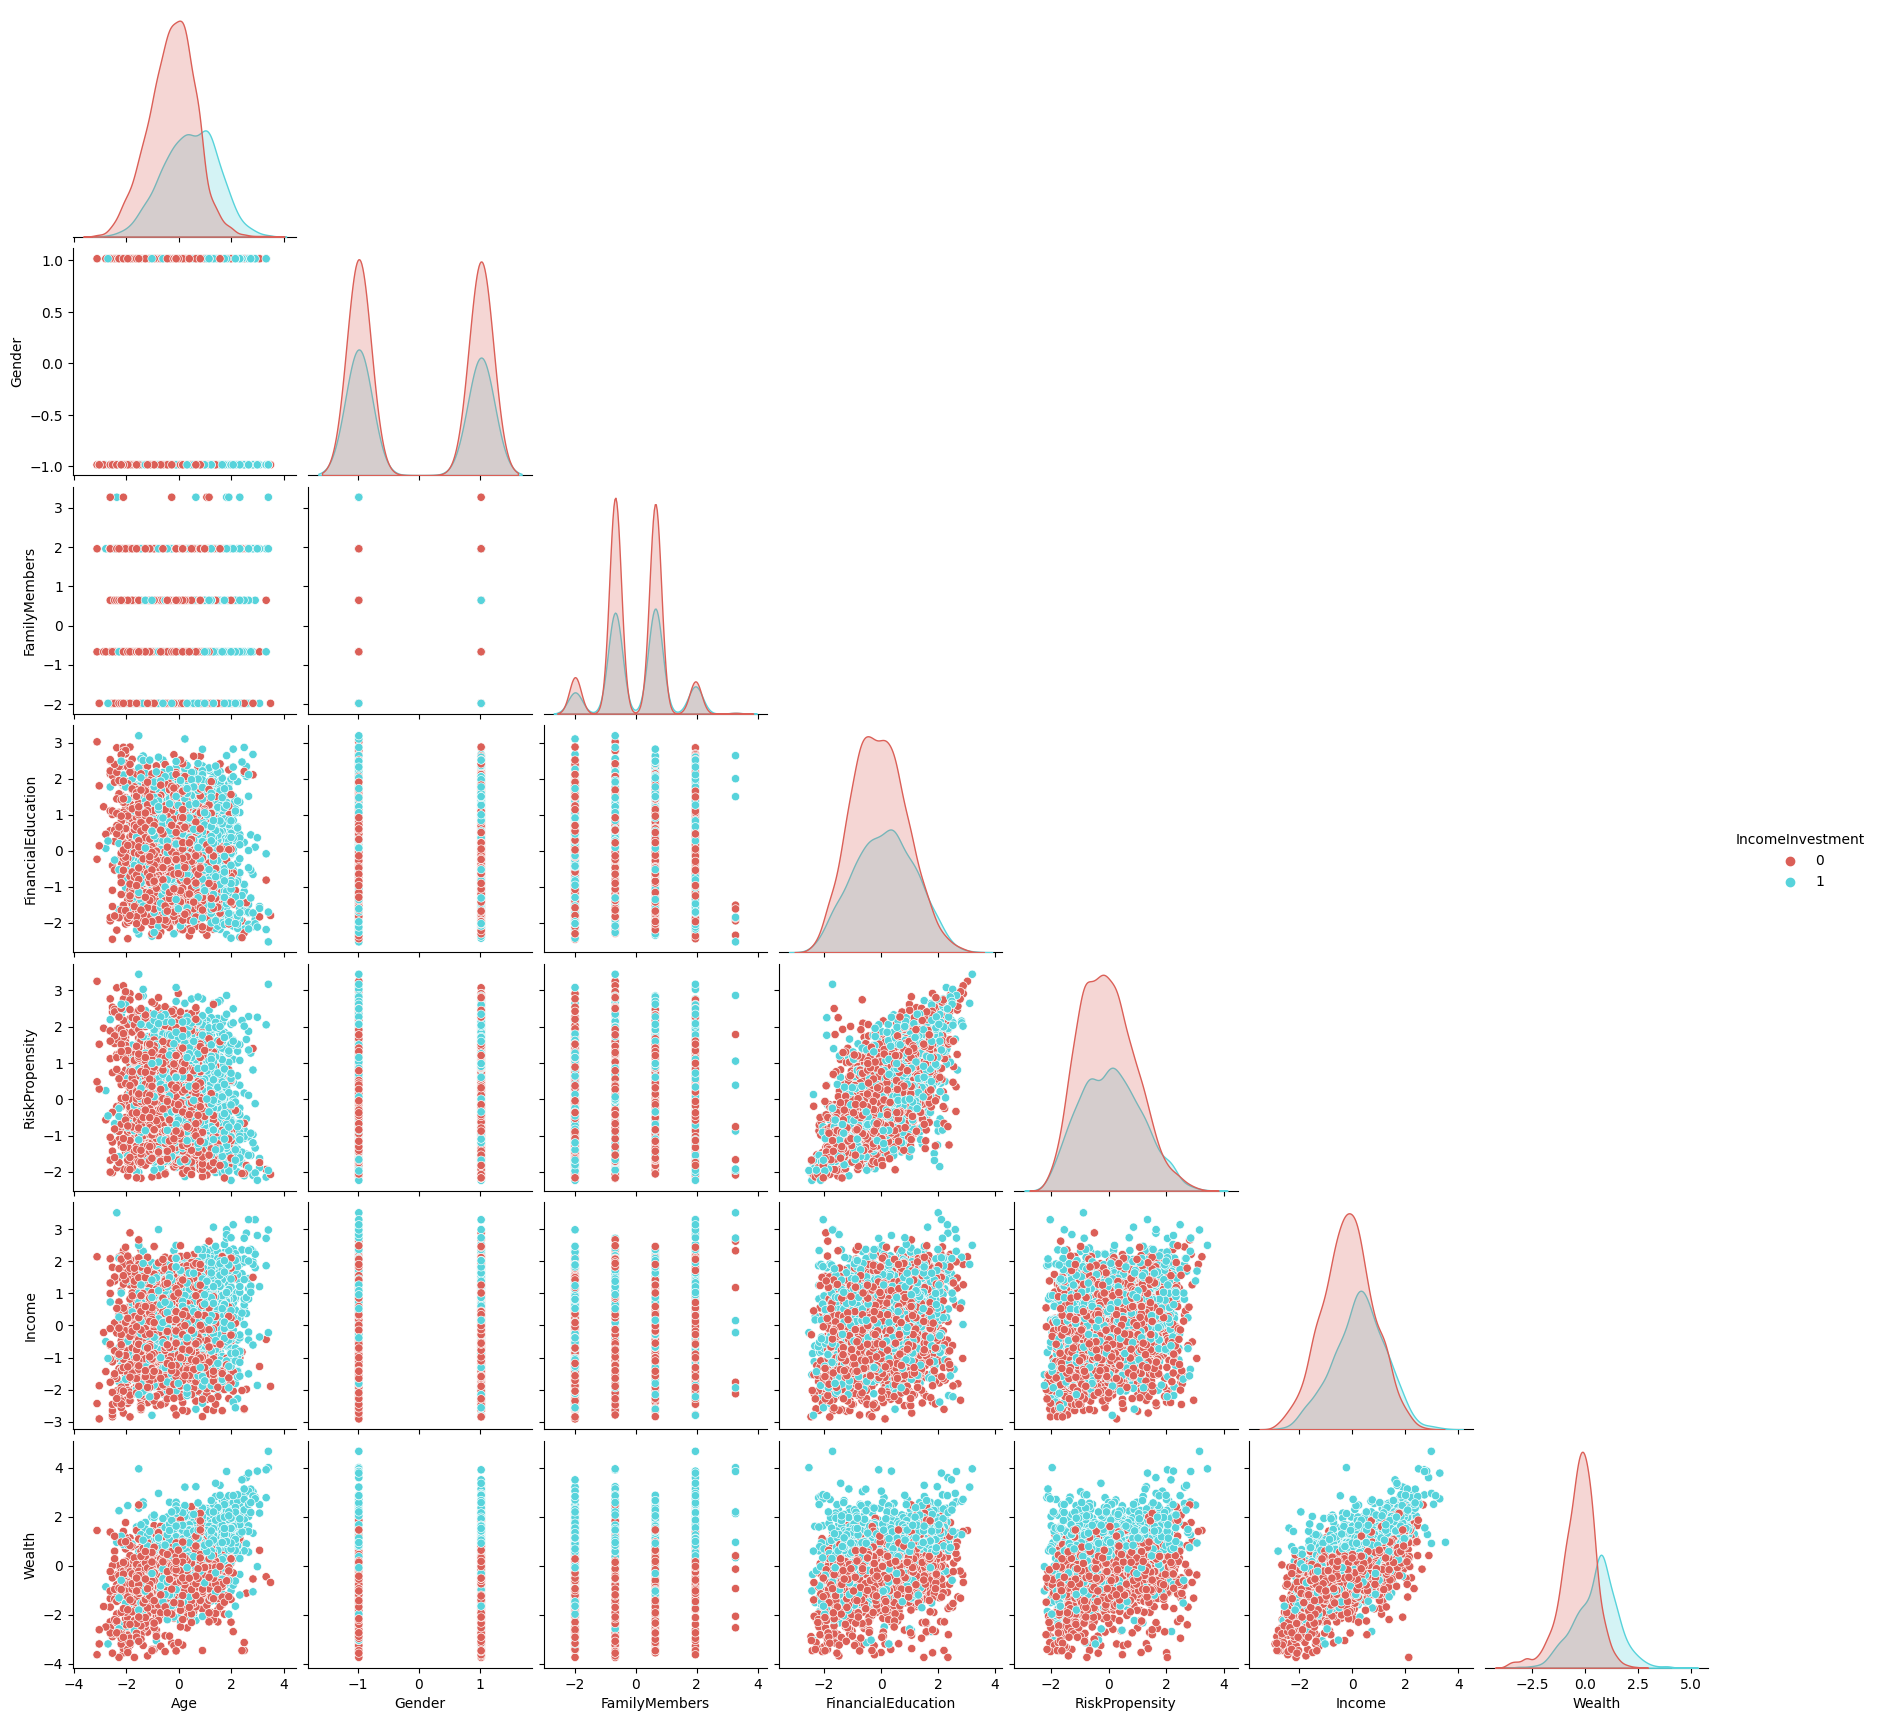

In [38]:
colour = sns.color_palette("hls", 2)
_ = sns.pairplot(pd.concat([x_df, y_inc_df], axis = 1), 
             hue= 'IncomeInvestment', 
             corner = True, 
             palette = colour, 
             vars = ['Age', 'Gender', 'FamilyMembers', 'FinancialEducation', 'RiskPropensity', 'Income', 'Wealth'])

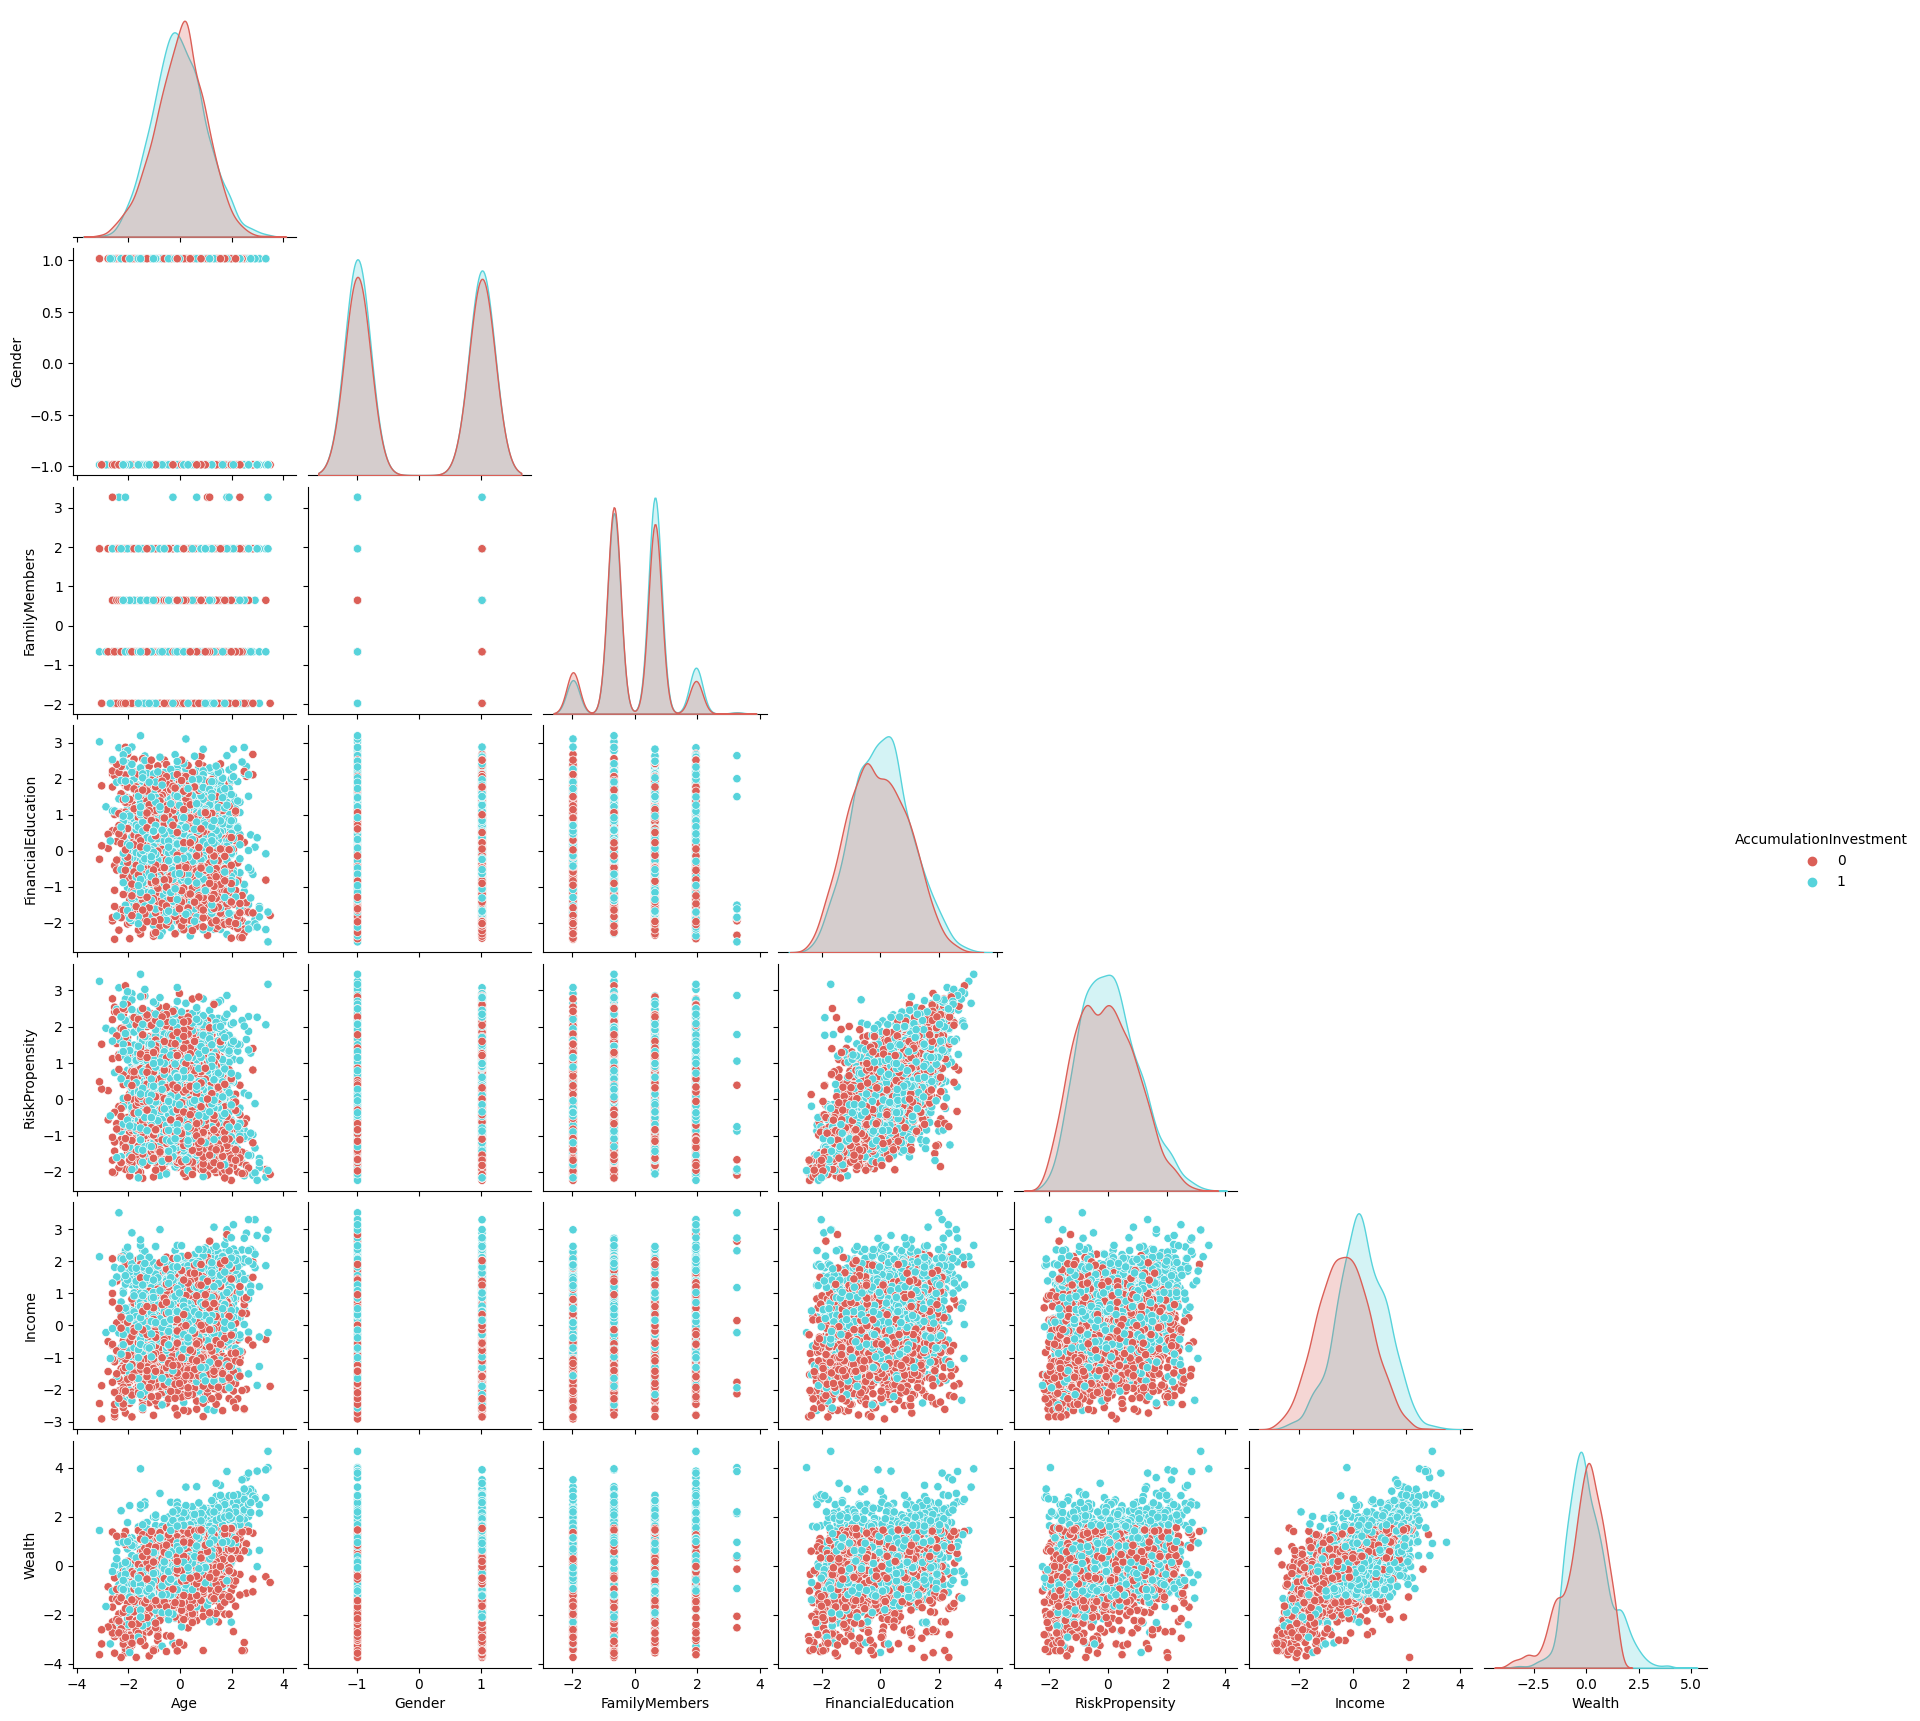

In [39]:
colour = sns.color_palette("hls", 2)
_ = sns.pairplot(pd.concat([x_df, y_acc_df], axis = 1), 
             hue= 'AccumulationInvestment', 
             corner = True, 
             palette = colour, 
             vars = ['Age', 'Gender', 'FamilyMembers', 'FinancialEducation', 'RiskPropensity', 'Income', 'Wealth'])

<code>Considerazioni sui plots (gender e famiglia possono essere eliminati)</code>

# Data preprocessing

<code>Qua va inserita la colonna income/wealth (da scalare), volendo altri controlli sulle features e considerazioni a priori</code>

Data exploration showed that <code>Wealth</code> and <code>Income</code> features are not gaussian distributed. A power law transformation is applied in order to modify the distribution related to these features.

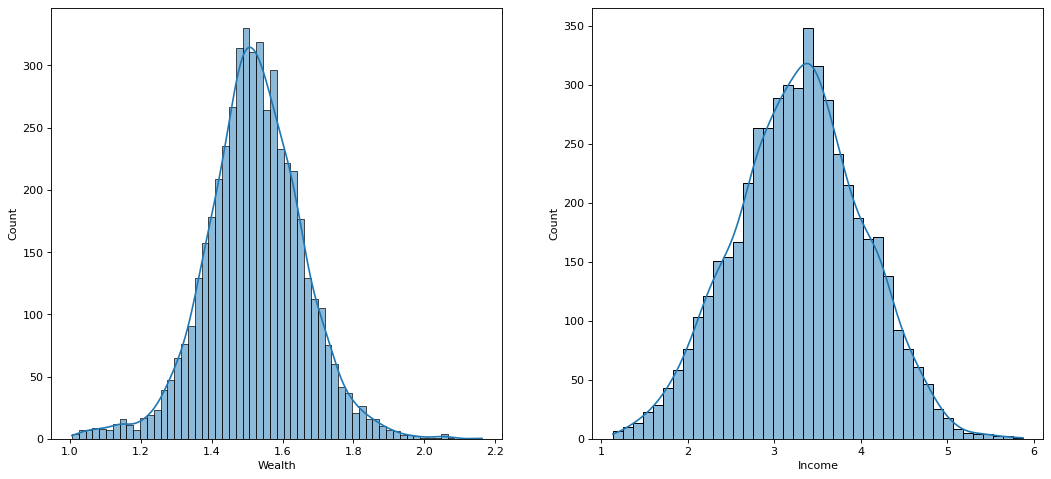

In [26]:
x_df['Wealth'] = x_df['Wealth']**0.1
x_df['Income'] = x_df['Income']**0.3

fig, axes = plt.subplots(1, 2, figsize=(16,7), dpi=80)
_ = sns.histplot(data=x_df, x='Wealth', ax=axes[0], kde=True)
_ = sns.histplot(data=x_df, x='Income', ax=axes[1], kde=True)

Standardization ($\mu =0\text{, }\sigma ^2=1$) is applied feature-wise to the dataframe.

In [27]:
for f in features:
    x_df[f] = (x_df[f] - np.mean(x_df[f])) / np.std(x_df[f])

### Classifier
- Dividere il dataset in training, validation, test set
- Scegliere che modello usare (logistic), trainarlo e vedere le performance
- Se non si è contenti, provare altri modelli

### "Algoritmo" per assegnazione dei prodotti
- E questo vabbè

# Classification

# Recommendation system